In [465]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Import Modules

Matplotlib/Pyplot used for graphing functions

Pandas used for CSV import


In [466]:
## Building Pandas DF from CSV
dataframe = pd.read_csv('data/ramen-ratings.csv',header=0)

## Data Cleaning
df = dataframe[dataframe['Stars'] != 'Unrated']
df = df[df['Country'] != '']
df = df.replace('United States','USA')            ## United States and USA are synonymous; unifying terms.
df = df.replace('Holland','Netherlands')          ## Holland is a province of the Netherlands; unifying terms. 
df = df.replace('Sarawak','Malaysia')             ## Sarawak is a state within Malaysia; unifying terms.


## Building a Top-Ten List
df_top = df.fillna(0)
df_top = df_top[df_top['Top Ten'] != 0]

## Converting DF to Dict for application of different methods
dictionary = df.to_dict('records')
dict_top = df_top.to_dict('records')

### Import and Clean the Data

A dataframe is built from the CSV. 

This dataframe is then cleaned, removing instances where Star-Rating and Country are not provided. 

A datafram of all top-ten entries is generated for future use.

The full dataframe and top-ten dataframe are converted to dict format, so both Pandas and vanilla methods can be used. 

In [467]:
print(f"\n{dictionary[0]}\n")
print(df.iloc[0])


{'Review #': 2580, 'Brand': 'New Touch', 'Variety': "T's Restaurant Tantanmen ", 'Style': 'Cup', 'Country': 'Japan', 'Stars': '3.75', 'Top Ten': nan}

Review #                         2580
Brand                       New Touch
Variety     T's Restaurant Tantanmen 
Style                             Cup
Country                         Japan
Stars                            3.75
Top Ten                           NaN
Name: 0, dtype: object


##### Note: 

Both storage formats contain the same data. However, this data is displayed in different formats, and different methods are required to interact with them. 

In [468]:
nation_count = df['Country'].value_counts()

### Defining Count of Nations

This is used in the pie chart, where it ends up determining the bounds for each slice. 

In [469]:
def simplify_pie_sizes(ls):
    simplified = []
    others = []
    for i in ls:
        if i >= 100:
            simplified.append(i)
        if i <= 99:
            others.append(i)
    simplified.append(sum(others))
    return simplified

def simplify_pie_labels(ls):
    i = len(simplify_pie_sizes(list(nation_count)))
    simplified = ls[:i-1]
    simplified.append('Others')
    return simplified

### Defining 'simple'

These functions cut the pie chart down to size. 

The first function selects any count values above 100, then sums the remainder into a 'Other' bucket. 

The second function selects the corresponding nations to those values over 100, then inserts an 'Other' label for the remainder to fall under. 

In [470]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '({v:d})'.format(v=val)
    return my_autopct

title = {
    'family': 'sans',
    'color':  'black',
    'weight': 'bold',
    'size': 13,
        }
label = {
    'family': 'sans',
    'color':  'black',
    'size': 8,
        }

### Pie Chart Helper Function & Formatting Dictionaries

This function will be called to determine the autopct (number labelling) for the pie chart.

The dictonaries contain text formatting arguments that will be passed into the title and labels to save space in the plot definition.

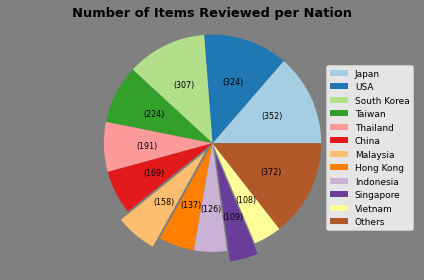

In [471]:
## Defining the plot
fig1, ax1 = plt.subplots()

## Providing Data
labels = simplify_pie_labels(list(nation_count.index.to_list()))              ## List of nation names. Matches to count.
sizes = simplify_pie_sizes(list(nation_count))                                ## List of count of nation names. Governs pie width.
explode = (0,0,0,0,0,0,.1,0,0,.1,0,0)                                         ## Malaysia and Singapore are outliers in terms of performance.

## Color Format
theme = plt.get_cmap('Paired')
ax1.set_prop_cycle("color",[theme(i / len(sizes)) for i in range(len(sizes))])

## Build graph
ax1.pie(sizes, 
        explode=explode, 
        textprops=label,
        autopct=make_autopct(sizes),                                          ## Calling helper function for whole number slice labelling 
        startangle=0)
ax1.axis('equal')
ax1.set_title('Number of Items Reviewed per Nation', fontdict=title)

## Under formatting
fig1.set_facecolor('grey')

plt.legend(
    loc=7,
    labels=labels,
    prop={'size': 9})

## Display
plt.tight_layout()
plt.show()

## Baking a Pie

The plot is defined. 

Data is provided, funneling through the simplification functions. 

Formatting is performed, labelling each slice with the number of items it represents. 

Nations with less than 100 items reviewed are placed in an 'Other' slice. 

Note: Malaysia and Singapore are highlighted, following their hypothesized abnormally high performance. 

## Up Next: Bar Graphs

In [472]:
## Generate a list of all 5 star reviews
high_star = []
for item in dictionary:
    if float(item['Stars']) == 5:
        high_star.append(item)
        
## Generate a list of all <2 star reviews
low_star = []
for item in dictionary:
    if float(item['Stars']) < 2:
        low_star.append(item)

## Generate a list of all nations with items reviewed.
all_nations = []
for i in dictionary:
    if i['Country'] not in all_nations:
        all_nations.append(i['Country'])
        
## Generate a list of all nations with items with 5 star reviews. 
star_nations = []
for i in high_star:
    if i['Country'] not in star_nations:
        star_nations.append(i['Country'])
        
## Generate a list of all nations with items with <2 star reviews. 
low_star_nations = []
for i in low_star:
    if i['Country'] not in low_star_nations:
        star_nations.append(i['Country'])

### Building the Base Lists

These lists will help simplify the bar graphs below, removing irrelevant entries.

In [473]:
""" 
Generates paired exclusive lists: 
Nations with 5 star reviews sorted by number of 5 star reviews. 
Corresponding number of 5 star reviews. 
Corresponding total number of reviews.
"""

hi_star_df = pd.DataFrame(high_star, columns=['Country'])
hi_star_countries_full = hi_star_df['Country'].to_list()
hi_star_countries_values = hi_star_df['Country'].value_counts().to_list()
hi_star_countries_sorted = []

for i in list(sorted(hi_star_countries_full,key=hi_star_countries_full.count,reverse=True)):
    if i not in hi_star_countries_sorted:
        hi_star_countries_sorted.append(i)

## Overcomplicated way to generate the corresponding total because my brain is too smooth to think of a way to do it properly

## build pandas df
df2 = pd.DataFrame(
        {'Country': list(nation_count.index.to_list()),
         'FCount': nation_count.to_list()}
        )
## split df into workable dict of lists
split = df2.to_dict('split')
split_list = split['data']

## sort and append totals
split_nat = []
split_val = []
for i in split_list:
    if i[0] in hi_star_countries_sorted:
            split_nat.append(i[0])
            split_val.append(i[1])
    res = {split_nat[i]: split_val[i] for i in range(len(split_nat))}

res = sorted(res.items(), key=lambda pair: hi_star_countries_sorted.index(pair[0]))

hi_star_countries_totals = []
for i in res:
    hi_star_countries_totals.append(i[1])
    
"""
list of names - hi_star_countries_sorted
list of 5 star count by name - hi_star_countries_values
list of total count by name - hi_star_countries_totals
"""

'\nlist of names - hi_star_countries_sorted\nlist of 5 star count by name - hi_star_countries_values\nlist of total count by name - hi_star_countries_totals\n'

## Determine the Values

This section generates the initial data to be used in determining high and low performing nations. 

For this report's purposes, 'high performing' can be determined by an abnormally high percentage of 5 star reviews.

For this report's purposes, 'low performing' can be identified by an abnormally low percentage of 5 star reviews, or an abnormally high percentage of <=1 star reviews. 

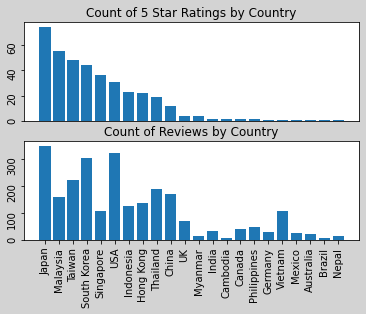

In [474]:
x1 = hi_star_countries_sorted
h1 = hi_star_countries_totals
h2 = hi_star_countries_values

fig, axs = plt.subplots(2)
axs[0].set_title('Count of 5 Star Ratings by Country')
axs[0].bar(x1,h2)
axs[0].tick_params(labelrotation=90)
axs[0].get_xaxis().set_visible(False)

axs[1].set_title('Count of Reviews by Country')
axs[1].bar(x1,h1)
axs[1].tick_params(labelrotation=90)

fig.set_facecolor('lightgrey')

plt.show()

## Setting the Bar

This graph displays the number of 5 star reviews by country. 

Below is displayed the total number of reviews for each country. 

However, this data can be displayed in a number of different ways.

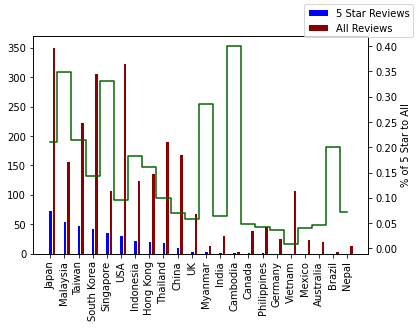

In [475]:
x1 = hi_star_countries_sorted
h1 = hi_star_countries_totals
h2 = hi_star_countries_values

fig, bar1 = plt.subplots()

# set width of bar
barWidth = 0.25 
 
# Set position of bar on X axis
r1 = np.arange(len(h2))
r2 = [x + barWidth for x in r1]

 
# build the clustered bar
bar1.bar(r1, h2, color='blue', width=barWidth, edgecolor='white', label='5 Star Reviews')
bar1.bar(r2, h1, color='darkred', width=barWidth, edgecolor='white', label='All Reviews')

# set second axis for line
line = bar1.twinx()

# make the line
percentiles = [(i / j) for i, j in zip(h2, h1)] 
line.plot(x1,percentiles,ds='steps-mid',c='darkgreen')
line.set_ylabel('% of 5 Star to All')

# Add xticks on the middle of the grouped bars/line centers
bar1.tick_params(axis='x',labelrotation=90)

# Create legend & Show graphic
fig.legend()
plt.show()

## Raising the Bar

This view shows where a customer is most likely to get the best possible ramen. 

Red values display the total number of reviews per country, an approximation of the number of offerings available.

Blue values display the number of 5 star reviews per country, an approximation of performance. 

The green line displays the percentage of 5 star reviews to all reviews, a measure of over/under-performance. This can help to identify instances where countries perform abnormally well: 

Abnormally well performing nations include Malaysia, Singapore, Myanmar. (Low sample size in Cambodia and Brazil must be taken into account).

Abnormally poor performing nations include the United States and Vietnam. 

In [476]:
""" 
For documentation on this section, please see 'Determine the Values' section above, as the code is almost identical. 
"""

lo_star_df = pd.DataFrame(low_star, columns=['Country'])
lo_star_countries_full = lo_star_df['Country'].to_list()
lo_star_countries_values = lo_star_df['Country'].value_counts().to_list()
lo_star_countries_sorted = []

for i in list(sorted(lo_star_countries_full,key=lo_star_countries_full.count,reverse=True)):
    if i not in lo_star_countries_sorted:
        lo_star_countries_sorted.append(i)
        
df3 = pd.DataFrame(
        {'Country': list(nation_count.index.to_list()),
         'FCount': nation_count.to_list()}
        )
split = df3.to_dict('split')
split_list = split['data']
split_nat = []
split_val = []
for i in split_list:
    if i[0] in lo_star_countries_sorted:
            split_nat.append(i[0])
            split_val.append(i[1])
    res = {split_nat[i]: split_val[i] for i in range(len(split_nat))}

res = sorted(res.items(), key=lambda pair: lo_star_countries_sorted.index(pair[0]))
lo_star_countries_totals = []
for i in res:
    lo_star_countries_totals.append(i[1])

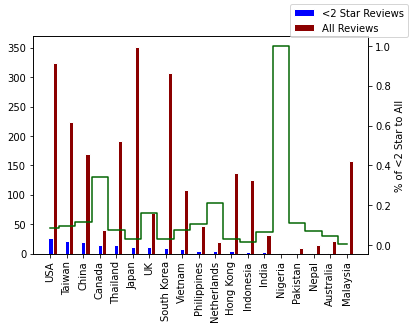

In [477]:
x1 = lo_star_countries_sorted
h1 = lo_star_countries_totals
h2 = lo_star_countries_values

fig, bar1 = plt.subplots()

# set width of bar
barWidth = 0.25 
 
# Set position of bar on X axis
r1 = np.arange(len(h2))
r2 = [x + barWidth for x in r1]

 
# Make the bar plot
bar1.bar(r1, h2, color='blue', width=barWidth, edgecolor='white', label='<2 Star Reviews')
bar1.bar(r2, h1, color='darkred', width=barWidth, edgecolor='white', label='All Reviews')

# set second axis for line
line = bar1.twinx()

# make the line
percentiles = [(i / j) for i, j in zip(h2, h1)] 
line.plot(x1,percentiles,ds='steps-mid',c='darkgreen')
line.set_ylabel('% of <2 Star to All')

# Add xticks on the middle of the grouped bars/line centers
bar1.tick_params(axis='x',labelrotation=90)

# Create legend & Show graphic
fig.legend()
plt.show()

## Lowering the Bar

This view shows where one is most likely to get the worst ramen.  

Red values display the total number of reviews per country, an approximation of the number of offerings available.

Blue values display the number of <2 star reviews per country, an approximation of particularly poor performance. 

The green line displays the percentage of <2 star reviews to all reviews, a measure of over/under-performance. 

Abnormal positive outliers include Malaysia and Singapore, with 1 and zero <2 star reviews, respectively. 

Abnormal negative outliers include Canada and the UK. Note that Nigeria's only review on record is <2 stars. 

## Conclusions

In [478]:
df4 = df
df4["Country"] = df4.Country.astype(str)
df4["Stars"] = df4.Stars.astype(float)
df4 = df4.set_index(['Review #'])
df4 = df4.drop(columns=['Brand','Variety','Style','Top Ten'])

# print(df4)
con_dict = df4.to_dict('records')

df4 = df4.groupby(['Country']).mean()

x = df4['Stars'].index.to_list()
h = df4['Stars'].to_list()

sorting = dict(zip(x,h))
finished = sorted(sorting.items(), key=lambda x: x[1], reverse=True)

x = []
h = []
for i in finished:
    if i[0] not in x:
        x.append(i[0])
    if i[1] not in x:
        h.append(i[1])

### Final Numbers

This section finds the combined average rating for each country.

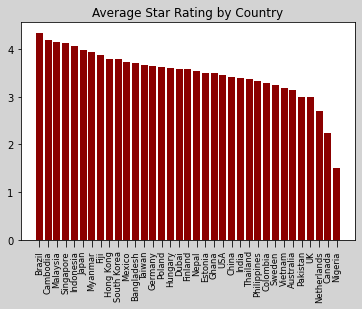

In [479]:
fig, axs = plt.subplots()
axs.set_title('Average Star Rating by Country')


axs.bar(x,h,color='darkred')
axs.tick_params(axis='x',labelrotation=90,size=7)
plt.xticks(fontsize='small')
fig.set_facecolor('lightgrey')

plt.show()

## Final Figure

This graph displays the average rating for each nation reviewed. 

It is this analyst's belief that the hypothesis has been proven, Malaysia and Singapore perform unusually well. 

Both nations are in the top 5 for number of 5 star ratings. Neither have more than 1 rating below 2 stars. Both are within the top 5 for overall star rating. 


### Thanks for reading!